# 1. Install and Import Dependencies

In [3]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

^C


In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [2]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ashis/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-7-18 torch 1.8.1+cu111 CUDA:0 (GeForce GTX 1650, 4096.0MB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
    

# 3. Make Detections with Images

In [5]:
img = 'D:\DD\yolov5\data\images\WIN_20210718_19_14_03_Pro.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 720x1280 (no detections)
Speed: 436.1ms pre-process, 71.8ms inference, 6.0ms NMS per image at shape (1, 3, 384, 640)


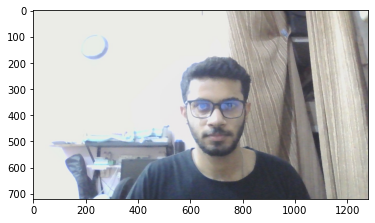

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [49]:
results.render()

[array([[[235, 236, 231],
         [235, 236, 231],
         [235, 236, 231],
         ...,
         [235, 236, 231],
         [235, 236, 231],
         [235, 236, 231]],
 
        [[235, 236, 231],
         [235, 236, 231],
         [235, 236, 231],
         ...,
         [235, 236, 231],
         [235, 236, 231],
         [235, 236, 231]],
 
        [[235, 236, 231],
         [235, 236, 231],
         [235, 236, 231],
         ...,
         [235, 236, 231],
         [235, 236, 231],
         [235, 236, 231]],
 
        ...,
 
        [[235, 236, 231],
         [235, 236, 231],
         [235, 236, 231],
         ...,
         [184, 179, 173],
         [185, 181, 172],
         [186, 182, 173]],
 
        [[235, 236, 231],
         [235, 236, 231],
         [235, 236, 231],
         ...,
         [185, 181, 172],
         [185, 181, 172],
         [185, 181, 172]],
 
        [[235, 236, 231],
         [235, 236, 231],
         [235, 236, 231],
         ...,
         [187, 183, 174],
  

# 4. Real Time Detections

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [50]:
import uuid   # Unique identifier
import os
import time

In [51]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [18]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [19]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.329d9711-e7cd-11eb-95c1-34c93d84889c.jpg


In [52]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.64739849-e7d4-11eb-b5d9-34c93d84889c.jpg
data\images\awake.6473984a-e7d4-11eb-b5f5-34c93d84889c.jpg
data\images\awake.6473984b-e7d4-11eb-bb74-34c93d84889c.jpg
data\images\awake.6473984c-e7d4-11eb-be28-34c93d84889c.jpg
data\images\awake.6473984d-e7d4-11eb-a7c9-34c93d84889c.jpg
data\images\drowsy.6473984e-e7d4-11eb-b4a0-34c93d84889c.jpg
data\images\drowsy.6473984f-e7d4-11eb-b053-34c93d84889c.jpg
data\images\drowsy.64739850-e7d4-11eb-b019-34c93d84889c.jpg
data\images\drowsy.64739851-e7d4-11eb-89b7-34c93d84889c.jpg
data\images\drowsy.64739852-e7d4-11eb-ae69-34c93d84889c.jpg


In [16]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [17]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
spyder 4.2.5 requires pyqt5<5.13, but you have pyqt5 5.15.4 which is incompatible.


In [15]:
import wandb

In [17]:
wandb.login(496f1214988294511b6097fcba6c407b001930d0)

SyntaxError: invalid syntax (<ipython-input-17-a44cdd901943>, line 1)

In [19]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=500, batch_size=16, img_size=[320], rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github:  WARNING: code is out of date by 1 commit. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.





YOLOv5  v5.0-294-gdd62e2d torch 1.8.1+cu111 CUDA:0 (GeForce GTX 1650, 4096.0MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-07-18 20:53:30.699030: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
wandb: Currently logged in as: theark (use `wandb login --relogin` to force relogin)
2021-07-18 20:53:34.526457: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-07-18 20:53:34.526480: I te

# 6. Load Custom Model

In [21]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\ashis/.cache\torch\hub\master.zip


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\ashis/.cache\\torch\\hub\\ultralytics_yolov5_master\\requirements.txt'

In [22]:
img = os.path.join('data', 'images', 'WIN_20210718_19_14_03_Pro.jpg')

NameError: name 'os' is not defined

In [23]:
results = model(img)

In [58]:
results.print()

image 1/1: 720x1280 (no detections)
Speed: 374.7ms pre-process, 57.1ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


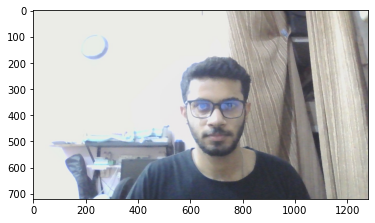

In [24]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()